# Titanic ML

In [2]:
# data analysis and wrangling

import pandas as pd
import numpy as np
import random as rnd

# visualisation

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# acquire training and testing datasets into Pandas DataFrames
# then combine datasets to run operations on them together

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [4]:
# get visibility of available features by printing their names

print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
# preview the data. head() method gives first 5 rows by default
# you can specify number of rows inside parenthesis

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# pandas library gives head() and tail() methods
# tail() method gives bottom 5 rows by default

train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# check data types for various features
# use pandas info() method to see this

train_df.info()
print('-'*40)
test_df.info()

# from this we can see 7 features are integers or floats
# and 5 are strings (object) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# specifying include inside the describe() method allows you to state what
# type of data you want. 'O' being object, so we expect the five string
# columns ie the categorical features:

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Brocklebank, Mr. William Alfred",male,347082,G6,S
freq,1,577,7,4,644


### Assumptions so far

Based on current data analysis, we can lump assumptions into each C.

**Correlating**

We want to know how well each feature correlates with Survival. We want to do this early in our project and match these correlations with modelled correlations later on in the project.

**Completing**

    1. We may want to complete the Age feature as it is most likely correlated to Survival.
    2. We may want to complete the Embarked feature as it may also correlate with Survival or another important feature.
    
**Correcting**

    1. Ticket feature may be dropped from our analysis as it contains a high ratio of duplicates (22%) and there may not be a correlation between Ticket and Survival.
    2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in the training and test datasets.
    3. PassengerId may be dropped from training dataset as it does not contribute to Survival.
    4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
    
**Creating**

    1. We may want to create a new feature called Family based on Parch and SibSp to get the total count of family members on board.
    2. We may want to feature engineer the Name feature to extract Title as a new feature.
    3. We may want to create a new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
    4. We may also want to create a Fare range feature if it helps our analysis.
    
**Classifying**

We may also add to our assumptions based on the problem description noted earlier.

    1. Women (Sex=female (due to lack of nuanced data)) were more likely to have survived.
    2. Children (Age<?) were more likely to have survived.
    3. The upper-class passengers (Pclass=1) were more likely to have survived.
    
### Analyse by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

- **Pclass** Using the ```corr()``` method, we observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- **Sex** We confirm the observation during problem definition that Sex=female had a high survival rate at 74% (classifying #1).
- **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [10]:
# use corr() method to view correlation between columns
# corr() takes optional 'method' parameter to specify which algorithm to use
# e.g. train_df.corr(method='spearman')

train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [28]:
# Find correlation specifically between different Pclass values (1,2,3) and Survived (0,1)

train_df[['Pclass', 'Survived']].groupby(['Pclass'], 
         as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [25]:
# Find correlation between Sex (male, female) and Survived (0,1)

train_df[["Sex", "Survived"]].groupby(['Sex'],
         as_index=False).mean().sort_values(by='Survived', ascending=False)



,Sex,Survived
0,female,0.742038
1,male,0.188908


In [26]:
# Find correlation between Siblings/Spouses and Survived


train_df[["SibSp", "Survived"]].groupby(['SibSp'], 
         as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [27]:
# Find correlation between Parch (parent/child) and Survived

train_df[["Parch", "Survived"]].groupby(['Parch'], 
         as_index=False).mean().sort_values(by='Survived', ascending=False)



,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Observations**

- Infants (Age <= 4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in the 15-35 age range.

**Decisions**

This analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age (our assumption classifying #2) in our model training.
- Complete the Age feature for null values (completing #1).
- We should band age groups (creating #3).

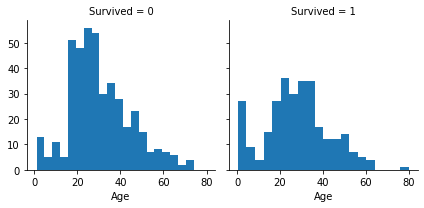

In [20]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#### Correlating numerical and ordinal features

We can combine multiple features to identify correlations with a single plot. This can be done using numerical and categorical features which have numeric values.

**Observations**

- Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
- Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
- Pclass varies in terms of Age distribution of passengers.

**Decisions**

- Consider Pclass for model training.

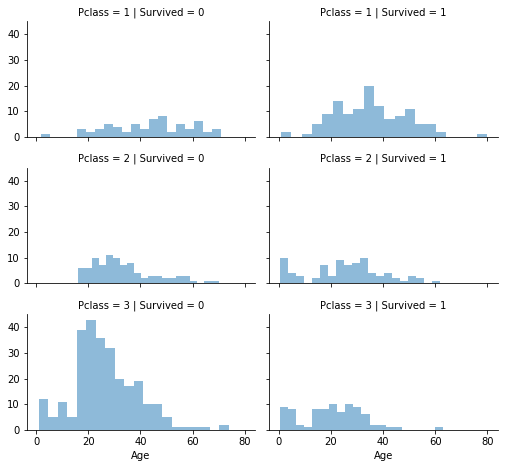

In [22]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',
                    height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

#### Correlating the categorical/qualitative features

We can now correlate categorical features with our solution goal.

**Observations**
- Women/girl passengers had a much better survival rate than men/boys. Confirms classifying(#1).
- There is an exception in Embarked=C where men/boys had a higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily a direct correlation between Embarked and Survived.
- Men/boys had a better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing(#2).
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating(#1).

**Decisions**
- Add Sex feature to model training.
- Complete and add Embarked feature to model training.

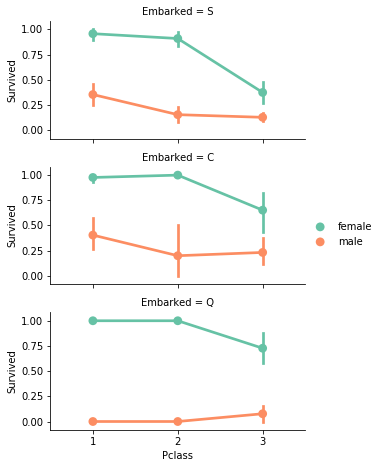

In [49]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked',
                    height=2.2, aspect=2.0)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette="Set2", 
        order=[1,2,3], hue_order=["female","male"])
grid.add_legend()

#### Correlating categorical (qualitative) and numerical (quantitative) features

We can consider correlating Embarked (categorical, non-numeric), Sex (Categorical, non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

**Observations**

- Higher fare-paying passengers had better survival rate. Confirms our assumption for creating(#4) fare ranges.
- Port of embarkation correlates with survival rates. Confirms correlating(#1) and completing(#2).

**Decisions**

- Consider banding Fare feature.

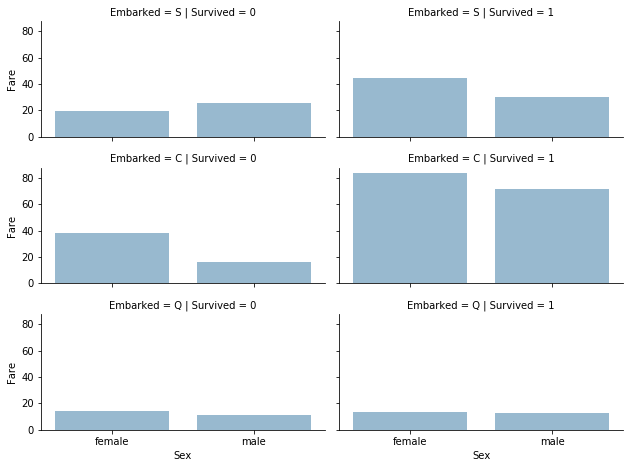

In [53]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})

grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2,
                     aspect=2.0)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### Wrangle data

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we haven't had to change a single feature or value to arrive at these. Now we can execute our decisions and assumptions for correcting, creating, and completing goals.

#### Correcting by dropping features

This is a good starting goal to execute. By dropping features, we're dealing with fewer data points. This speeds up notebook and eases analysis.

Based on our assumptions and decisions we want to drop the Cabin(correcting #2) and Ticket(correcting #1) features.

Note that where applicable, we perform operations on both training and testing datasets together to stay consistent.

In [65]:
# PERMANENT CHANGES MADE TO DATAFRAMES BELOW
# print("Before", train_df.shape, test_df.shape, combine[0].shape,
#     combine[1].shape)
# >> Before (891, 12) (418, 11) (891, 12) (418, 11)

# train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
# test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
# combine = [train_df, test_df]

# "After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

# >> ('After', (891, 10), (418, 9), (891, 10), (418, 9))

#### Creating new feature extracted from existing one

We want to analyse if the Name feature can be engineered to extract titles then test the correlation between Titles and Survival, before dropping Name and PassengerID features.

In the following code, we extract Title features using regular expressions (regex). The RegEx pattern ```(\w+\.)``` matches the first word which ends with a dot character within the Name feature. The expand=False flag returns a DataFrame.

**Observations**

When we plot Title, Age, and Survived, we note the following observations:

- Most titles band Age groups accurately. For example: Master title has an Age mean of 5 years.
- Survival among Title and Age bands varies slightly.
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

**Decision**

- We decide to retain the new Title feature for model training.

In [66]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', 
                                               expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace titles with a more common name or classify as ```Rare```.

In [67]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess',
    'Capt', 'Col',\
       'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We can convert the categorical titles to ordinal

In [72]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0.0


Now we can safelt drop the Name feature from training and testing datasets. We also don't need PassengerID feature in the training dataset.

In [74]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [75]:
#### Converting a categorical feature